In [1]:
import importlib

import numpy as np
from matplotlib import pyplot as plt

import spin_models
importlib.reload(spin_models)
from spin_models import Ising, IsingEnsemble

In [5]:
temperatures = np.geomspace(0.1, 10, 30)
ising = IsingEnsemble(lattice_shape=(20, 20),
                     n_ensemble=32,
                     temperatures=temperatures)
ising.sample(n_sweeps=2**16, cluster_update_interval=2**0)

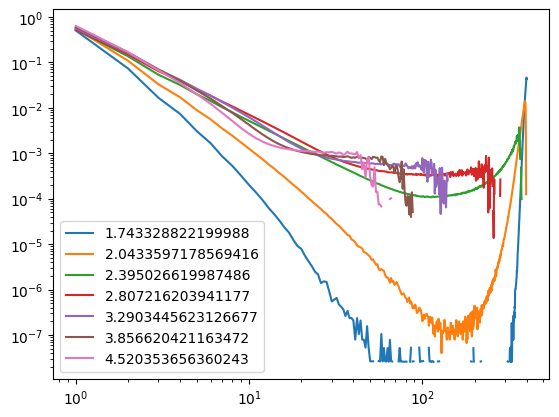

In [6]:
csds = ising.get_csds()[18:25].T
csds[csds == 0] = np.nan

plt.plot(np.arange(1, 401), csds)
plt.xscale('log')
plt.yscale('log')
plt.legend(temperatures[18:25])
plt.show()

Create an ensemble of 32 independent Ising bimodal spin glasses of size 8 x 8 x 8

In [ ]:
temperatures = np.geomspace(0.1, 10, 30)
ising_ensemble = IsingEnsemble(lattice_shape=(8, 8, 8), 
                               n_ensemble=32, 
                               couplings='bimodal', 
                               temperatures=temperatures)
ising_ensemble.sample(n_sweeps=2**16)

Plot the internal energy with respect to temperature

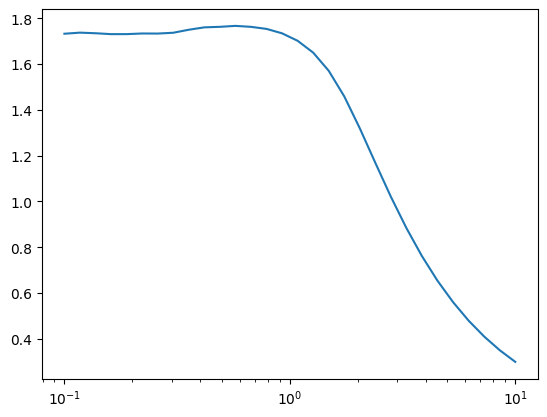

In [36]:
plt.plot(temperatures, ising_ensemble.get_energies())
plt.xscale('log')
plt.show()